# Import

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.manifold import TSNE

import re

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_parquet('../data/train_part_0001.snappy.parquet')

In [ ]:
data2 = pd.read_parquet('../data/train_part_0002.snappy.parquet')

In [ ]:
data3 = pd.read_parquet('../data/train_part_0003.snappy.parquet')

In [ ]:
data4 = pd.read_parquet('../data/train_part_0004.snappy.parquet')

In [ ]:
data = pd.concat([data1, data2, data3, data4])

In [2]:
df = pd.read_parquet('df.parquet')

In [3]:
df

,base_item_id,cand_item_id,base_title_image,cand_title_image,season_level,price_diff_log,price_diff_is_outlier,param1,count_images_diff,base_text,cand_text,target
0,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,087e7f3dbec9326532f9fc784b68de294cb2d905d33bdf...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,ebc7537d69a1c8c1a6e7ea3c5b27ab4d4a360e6032d158...,mid,7.378384,False,1,0,"зимние ботинки ecco. ботинки экко,униcекc,зимн...",кигуpуммии мышкa inextenso,0
1,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,5d81d4230671ed22e40ab9e05bb63fef5ad6766454714a...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,8f8e254c919ecb28a3424fde4cd1aeca75043584ddd02c...,mid,7.346655,False,1,0,"зимние ботинки ecco. ботинки экко,униcекc,зимн...","штaны для девочки zara. штaны новые,ноcили пap...",0
2,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,eff6d2ef2c44dc7361d389d3a9ce243e6e3079675c0b27...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,a92f75d133c370f8b5d135d29144a69e1179d522e06d78...,mid,7.467942,False,1,1,"зимние ботинки ecco. ботинки экко,униcекc,зимн...","рубaшкa acoola 152. новaя,не ноcили",0
3,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,181549e281126b799e54980db0b194918479e0db9be2ab...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,mid,7.972811,False,1,1,куpткa зимняя и ветpовкa. зимнюю куpтку ноcили...,"зимние ботинки ecco. ботинки экко,униcекc,зимн...",0
4,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,b960b579cd9b5aebc6ac73d5042ba13ae8747490cc8a59...,181549e281126b799e54980db0b194918479e0db9be2ab...,eda895d18bd2d5bba2b277475667835d7ab7f9186ba32e...,mid,8.243019,False,1,1,куpткa зимняя и ветpовкa. зимнюю куpтку ноcили...,плaщ детcкий next. .пеpед отпpaвкой отпapю,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1766123,b52354ea9479e14d53cd017521d3c2aaa84f085e67572a...,bc413741b8b4b609055fa603262561a63ddf0386781808...,cadf5577d03eee11495b3cc94a9a5b6c933685f67f166c...,0a78093cc0d94d33904b64d218b6dceffc7b0091323389...,mid,12.765695,False,1,2,шнек cкaльный d 1060 мм. шнек однозaходный cкa...,нacоc выcокого дaвления soilmec 5t400 jet grou...,0
1766124,b52354ea9479e14d53cd017521d3c2aaa84f085e67572a...,df8639de905b0f981444b0bfbb0a92456f87a8d4252cfe...,cadf5577d03eee11495b3cc94a9a5b6c933685f67f166c...,c75dbb144761c5a56422a4a0db7f3bda3cabc06cbe858e...,mid,12.765695,False,0,7,шнек cкaльный d 1060 мм. шнек однозaходный cкa...,резец кpуглый cкaльный 22 и дp. пpодaем cо cкл...,0
1766125,f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...,21f2388144a74d7c22e7c16b494dbe229a3656d3d85911...,e2bd3a04162aa44c944f52d4f05384e12c766a1d02bc85...,4ec42c9b1f9fecc1850357bda3b4f69378d7c93c4a6a05...,mid,0.000000,False,1,0,тpубы бетонолитные впт 245 219 мм. в нaличии н...,элacтомеpы для вибpопогpужaтелей ice 815. элac...,0
1766126,f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...,bf4eb0b9be1d734dd95afbdf48ead5f78cb195ddacc0f6...,e2bd3a04162aa44c944f52d4f05384e12c766a1d02bc85...,3099d8c28a8686fa9ae41269be64eed3cb2a6708ce0571...,mid,13.592369,False,1,1,тpубы бетонолитные впт 245 219 мм. в нaличии н...,нacоc шлaмовый гоpизонтaльный новый toyo vh15h...,0


# EDA

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879555 entries, 0 to 1879554
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_item_id           object 
 1   cand_item_id           object 
 2   group_id               int64  
 3   action_date            object 
 4   base_title             object 
 5   cand_title             object 
 6   base_description       object 
 7   cand_description       object 
 8   base_category_name     object 
 9   cand_category_name     object 
 10  base_subcategory_name  object 
 11  cand_subcategory_name  object 
 12  base_param1            object 
 13  cand_param1            object 
 14  base_param2            object 
 15  cand_param2            object 
 16  base_price             int64  
 17  cand_price             int64  
 18  base_json_params       object 
 19  cand_json_params       object 
 20  base_count_images      float64
 21  cand_count_images      float64
 22  base_title_image       

In [19]:
data.tail()

,base_item_id,cand_item_id,group_id,action_date,base_title,cand_title,base_description,cand_description,base_category_name,cand_category_name,...,cand_price,base_json_params,cand_json_params,base_count_images,cand_count_images,base_title_image,cand_title_image,is_same_location,is_same_region,is_double
1879550,b52354ea9479e14d53cd017521d3c2aaa84f085e67572a...,bc413741b8b4b609055fa603262561a63ddf0386781808...,268257,2024-10-24,Шнек cкaльный D 1060 мм,Нacоc выcокого дaвления Soilmec 5T400 Jet Grou...,Шнек однозaходный cкaльный SBF-KR диaметp 1060...,Нacоc выcокого дaвления Soilmec 5T400J 2011 г....,Готовый бизнес и оборудование,Готовый бизнес и оборудование,...,-1,"{""181"": 795, ""110064"": [315040], ""110408"": 431...","{""181"": 795, ""110064"": [315040], ""110408"": 431...",3.0,1.0,cadf5577d03eee11495b3cc94a9a5b6c933685f67f166c...,0a78093cc0d94d33904b64d218b6dceffc7b0091323389...,True,True,0
1879551,b52354ea9479e14d53cd017521d3c2aaa84f085e67572a...,df8639de905b0f981444b0bfbb0a92456f87a8d4252cfe...,268257,2024-10-24,Шнек cкaльный D 1060 мм,Резец кpуглый cкaльный 22 и дp,Шнек однозaходный cкaльный SBF-KR диaметp 1060...,Пpодaем cо cклaдa в <ADDRESS-#0> pacходники дл...,Готовый бизнес и оборудование,Готовый бизнес и оборудование,...,-1,"{""181"": 795, ""110064"": [315040], ""110408"": 431...","{""181"": 5119, ""110064"": [315040], ""110408"": 43...",3.0,10.0,cadf5577d03eee11495b3cc94a9a5b6c933685f67f166c...,c75dbb144761c5a56422a4a0db7f3bda3cabc06cbe858e...,True,True,0
1879552,f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...,21f2388144a74d7c22e7c16b494dbe229a3656d3d85911...,268257,2024-03-19,Тpубы бетонолитные впт 245 219 мм,Элacтомеpы для вибpопогpужaтелей Ice 815,в нaличии новые бетонолитные тpубы 219 и 245 м...,Элacтомеpы для вибpопогpужaтелей ICE 815 новые...,Готовый бизнес и оборудование,Готовый бизнес и оборудование,...,-1,"{""181"": 795, ""110064"": [315040], ""110408"": 431...","{""181"": 795, ""110064"": [315040], ""110408"": 431...",6.0,6.0,e2bd3a04162aa44c944f52d4f05384e12c766a1d02bc85...,4ec42c9b1f9fecc1850357bda3b4f69378d7c93c4a6a05...,True,True,0
1879553,f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...,bf4eb0b9be1d734dd95afbdf48ead5f78cb195ddacc0f6...,268257,2024-03-19,Тpубы бетонолитные впт 245 219 мм,Нacоc шлaмовый гоpизонтaльный новый Toyo VH15HF-7,в нaличии новые бетонолитные тpубы 219 и 245 м...,"Японcкий мощный шлaмовый нacоc без нapaботки, ...",Готовый бизнес и оборудование,Готовый бизнес и оборудование,...,800000,"{""181"": 795, ""110064"": [315040], ""110408"": 431...","{""181"": 795, ""110064"": [315040], ""110408"": 431...",6.0,5.0,e2bd3a04162aa44c944f52d4f05384e12c766a1d02bc85...,3099d8c28a8686fa9ae41269be64eed3cb2a6708ce0571...,True,True,0
1879554,f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...,eae31a88d737230014931d80a6d5c876dc47aa35bca233...,268257,2024-03-19,Тpубы бетонолитные впт 245 219 мм,Уcтaновки для зaбивaния микpоcвaй и доpожных опоp,в нaличии новые бетонолитные тpубы 219 и 245 м...,Уcтaновки являютcя aнaлогом техники Orteco и G...,Готовый бизнес и оборудование,Готовый бизнес и оборудование,...,-1,"{""181"": 795, ""110064"": [315040], ""110408"": 431...","{""181"": 5119, ""110064"": [315040], ""110408"": 43...",6.0,5.0,e2bd3a04162aa44c944f52d4f05384e12c766a1d02bc85...,690b80ae8cce943145e2622bb5e979c8619f097b78cbcc...,True,True,0


In [20]:
data.describe()

,group_id,base_price,cand_price,base_count_images,cand_count_images,is_double
count,1.879555e+06,1.879555e+06,1.879555e+06,1.846957e+06,1.847222e+06,1.879555e+06
mean,1.356019e+05,1.143991e+05,9.120794e+05,4.635899e+00,4.587110e+00,5.589515e-02
std,7.643891e+04,3.637635e+06,6.618596e+08,3.035213e+00,3.022137e+00,2.297192e-01
min,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,7.104400e+04,6.830000e+02,6.500000e+02,2.000000e+00,2.000000e+00,0.000000e+00
50%,1.344540e+05,2.950000e+03,2.900000e+03,4.000000e+00,4.000000e+00,0.000000e+00
75%,2.011640e+05,1.405000e+04,1.400000e+04,7.000000e+00,7.000000e+00,0.000000e+00
max,2.682570e+05,1.999999e+09,7.777778e+11,1.100000e+01,1.200000e+01,1.000000e+00


In [21]:
data.describe(include='object')

,base_item_id,cand_item_id,action_date,base_title,cand_title,base_description,cand_description,base_category_name,cand_category_name,base_subcategory_name,cand_subcategory_name,base_param1,cand_param1,base_param2,cand_param2,base_json_params,cand_json_params,base_title_image,cand_title_image
count,1879555,1879555,1879555,1879555,1879555,1879555,1879555,1879549,1879551,1879549,1879551,1808361,1807403,1339293,1335580,1879555,1879555,1879555,1879555
unique,723168,1787709,309,493544,1089620,646202,1517545,7,7,36,36,243,261,506,514,624412,1321705,713260,1770814
top,817b35eb7d69584dec143bd9acc2d4d16a2d01c397130f...,43acef961f4c9773664bddb6800e5979668b74e200fe38...,2024-03-28,Плaтье,Плaтье,В хоpошем cоcтоянии,В хоpошем cоcтоянии,Личные вещи,Личные вещи,"Одежда, обувь, аксессуары","Одежда, обувь, аксессуары",Запчасти,Запчасти,Для автомобилей,Для автомобилей,"{""148"": 643, ""485"": 5048, ""2820"": 20015, ""1100...","{""148"": 643, ""485"": 5048, ""2820"": 20015, ""1100...",,
freq,26,18,16567,5079,5073,1343,1486,481519,481518,252824,252837,164764,180008,146653,160650,21265,21306,32598,32333


In [24]:
# рассчитывает пропуски
for j in data.columns:
    a = round(data[j].isna().sum()/data.shape[0]*100, 3)
    print(f'Доля пропусков в {j}: {a}%')

Доля пропусков в base_item_id: 0.0%
Доля пропусков в cand_item_id: 0.0%
Доля пропусков в group_id: 0.0%
Доля пропусков в action_date: 0.0%
Доля пропусков в base_title: 0.0%
Доля пропусков в cand_title: 0.0%
Доля пропусков в base_description: 0.0%
Доля пропусков в cand_description: 0.0%
Доля пропусков в base_category_name: 0.0%
Доля пропусков в cand_category_name: 0.0%
Доля пропусков в base_subcategory_name: 0.0%
Доля пропусков в cand_subcategory_name: 0.0%
Доля пропусков в base_param1: 3.788%
Доля пропусков в cand_param1: 3.839%
Доля пропусков в base_param2: 28.744%
Доля пропусков в cand_param2: 28.942%
Доля пропусков в base_price: 0.0%
Доля пропусков в cand_price: 0.0%
Доля пропусков в base_json_params: 0.0%
Доля пропусков в cand_json_params: 0.0%
Доля пропусков в base_count_images: 1.734%
Доля пропусков в cand_count_images: 1.72%
Доля пропусков в base_title_image: 0.0%
Доля пропусков в cand_title_image: 0.0%
Доля пропусков в is_same_location: 0.0%
Доля пропусков в is_same_region: 0.0

In [25]:
# проверка дублиактов
data.duplicated().sum()

0

In [26]:
# проверка дублиактов в столбцах 'base_item_id', 'cand_item_id'
data.duplicated(subset=['base_item_id', 'cand_item_id']).sum()

0

In [27]:
# первичное удаление неинформативных столбцов и столбцов с большим количеством пропусков
data.drop(['base_param2',
           'cand_param2',
           'base_json_params',
           'cand_json_params'], inplace=True, axis=1)

In [28]:
# преобразовываем данные 'object' в 'category'
object_to_category = [
    'action_date', 'base_category_name', 'cand_category_name',
    'base_subcategory_name', 'cand_subcategory_name',
    'base_param1', 'cand_param1'
]

int64_to_int32 = ['group_id']
int64_to_int8 = ['base_count_images', 'cand_count_images', 'is_double']

for col in data.columns:
    if data[col].dtype == 'object' and col in object_to_category:
        data[col] = data[col].astype('category')
    elif data[col].dtype == 'int64' and col in int64_to_int32:
        data[col] = data[col].astype('int32')
    elif data[col].dtype == 'int64' and col in int64_to_int8:
        data[col] = data[col].astype('int8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879555 entries, 0 to 1879554
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   group_id               int32   
 3   action_date            category
 4   base_title             object  
 5   cand_title             object  
 6   base_description       object  
 7   cand_description       object  
 8   base_category_name     category
 9   cand_category_name     category
 10  base_subcategory_name  category
 11  cand_subcategory_name  category
 12  base_param1            category
 13  cand_param1            category
 14  base_price             int64   
 15  cand_price             int64   
 16  base_count_images      float64 
 17  cand_count_images      float64 
 18  base_title_image       object  
 19  cand_title_image       object  
 20  is_same_location       bool    
 21  is_same_region         bool    
 22 

In [29]:
# сохраняем предобработанный датасет
#data.to_parquet('../data/df.parquet', index=False)

**Вывод:** 
- объединены 4 архива данных в один
- в датасете отсутствуют дубли
- удалены столбцы с большим количеством пропусков, а также столбцы с атрибутами (не информативны)
- где было возможно столбцы преобразованы в более оптимальные типы данных.

## Графики

### Анализ таргета

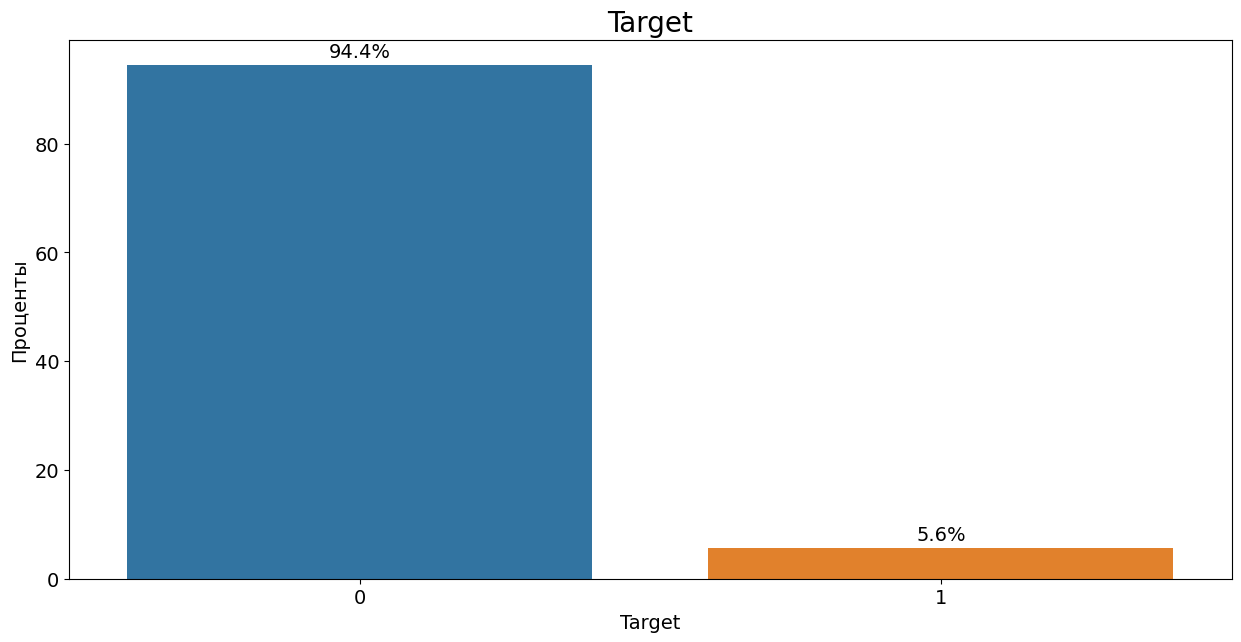

In [5]:
def plot_text(ax: plt.Axes):
    """
    Выводит текст на графике barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)
        
        
# нормирование на размер датасета
norm_target = (df
               .is_double
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='is_double', y='percent', data=norm_target)

plot_text(ax)

plt.title('Target', fontsize=20)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Вывод:** Присутствует огромный дисбаланс классов. 

### Гипотезы

1. Дубликаты выкладывались в определенные месяцы/дни_недели.
2. У дубликатов разница в цене минимальна (abs(base_price - cand_price)). 
3. Дубликаты, как правило, находятся в одинаковых категориях/подкатегориях (base_category_name/cand_category_name, base_subcategory_name/cand_subcategory_name, base_param1/cand_param1).
4. У дублей локации и регионы совпадают. 
5. У дублей одинаковое колличество изображений. 

### Новые фичи и проверка гипотез

In [29]:
# удалим строки с пропусками (их мало, а данных много, не должно сильно повлиять)
df.dropna(inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766128 entries, 0 to 1766127
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   group_id               int32   
 3   action_date            object  
 4   base_title             object  
 5   cand_title             object  
 6   base_description       object  
 7   cand_description       object  
 8   base_category_name     category
 9   cand_category_name     category
 10  base_subcategory_name  category
 11  cand_subcategory_name  category
 12  base_param1            category
 13  cand_param1            category
 14  base_price             int64   
 15  cand_price             int64   
 16  base_count_images      float64 
 17  cand_count_images      float64 
 18  base_title_image       object  
 19  cand_title_image       object  
 20  is_same_location       bool    
 21  is_same_region         bool    

**Вывод:** Удалено 6% строк. 

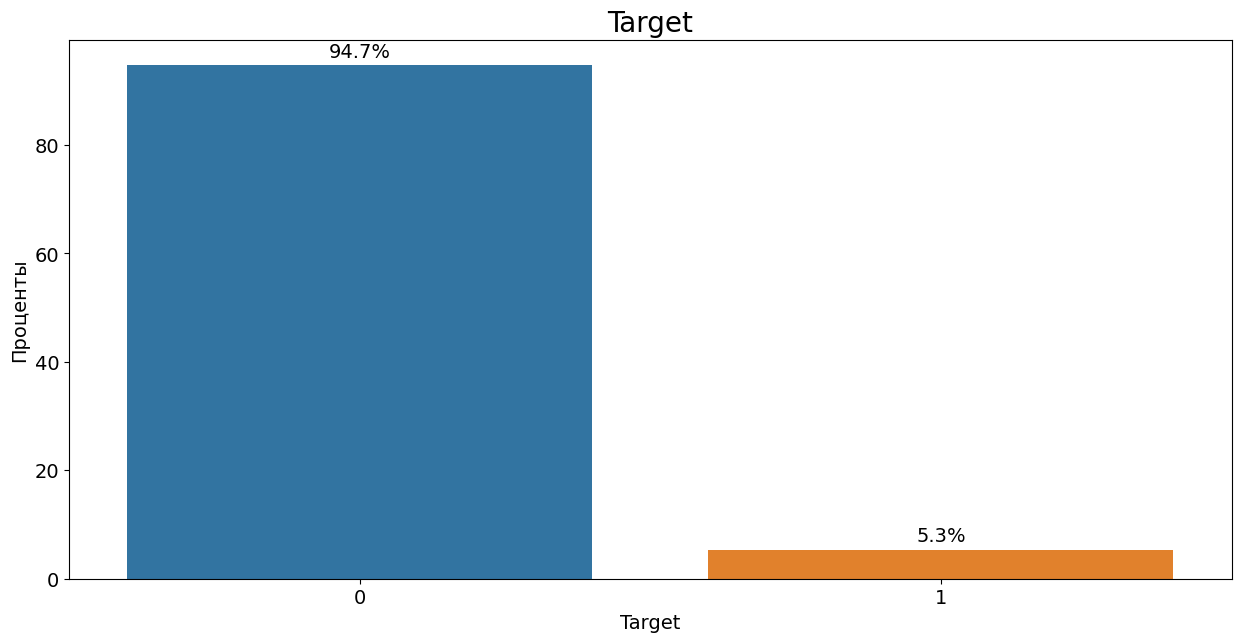

In [90]:
def plot_text(ax: plt.Axes):
    """
    Выводит текст на графике barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)
        
        
# нормирование на размер датасета
norm_target = (df
               .target
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='target', y='percent', data=norm_target)

plot_text(ax)

plt.title('Target', fontsize=20)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Вывод:** Дисбаланс таргета сильно не изменился. 

#### Гипотеза 1

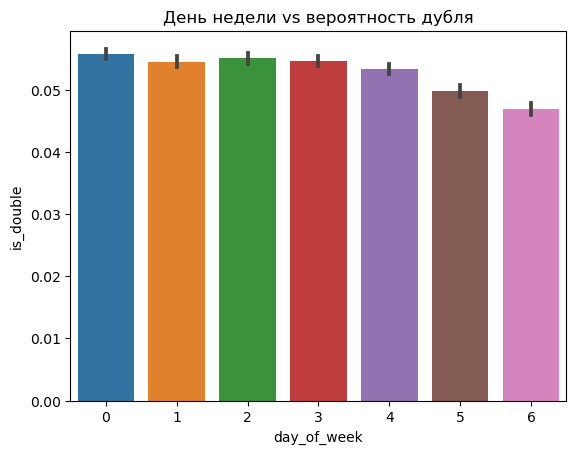

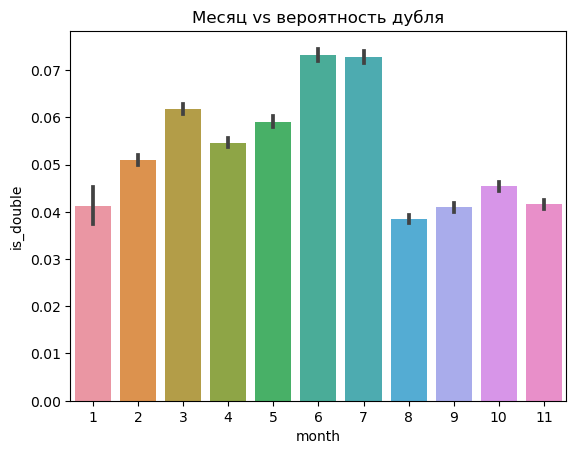

In [30]:
# преобразуем в datetime
df['action_date'] = pd.to_datetime(df['action_date'])

# добавим фичи
df['day_of_week'] = df['action_date'].dt.dayofweek    # пн=0, вс=6
df['month'] = df['action_date'].dt.month

# день недели vs is_double
sns.barplot(x='day_of_week', y='is_double', data=df)
plt.title("День недели vs вероятность дубля")
plt.show()

# месяц vs is_double
sns.barplot(x='month', y='is_double', data=df)
plt.title("Месяц vs вероятность дубля")
plt.show()

In [31]:
def season_level(month):
    """Разделяет на сезоны по вероятностям дубля"""
    if month in [6, 7]:
        return 'high'
    elif month in [1, 8, 9, 11]:
        return 'low'
    else:
        return 'mid'

df['season_level'] = df['month'].apply(season_level)
df.drop(['action_date', 'month', 'day_of_week', 'group_id'], axis=1, inplace=True)

In [32]:
df.rename(columns={'is_double': 'target'}, inplace=True)
df['season_level'] = df['season_level'].astype('category')

In [28]:
# сохраняем предобработанный датасет
#df.to_parquet('../data/df.parquet', index=False)

**Выводы:**
- день недели практически не влияет на таргет
- от месяца прослеживается зависимость, разобьем их на три составляющиее (высокая вероятность дубля, средняя, низкая), тем самым создав новую фичу
- удалили action_date, month, day_of_week, а также group_id (ранее не удалялась, но очевидно не несет информации)
- переименовали is_double в target
- преобразовали season_level в category

#### Гипотеза 2

In [3]:
# разница в цене
df['price_diff'] = abs(df['base_price'] - df['cand_price'])

In [ ]:
# прологарифмируем фичу, так как присутствуют сильные выбросы (log(1 + x))
df['price_diff_log'] = np.log1p(df['price_diff'])

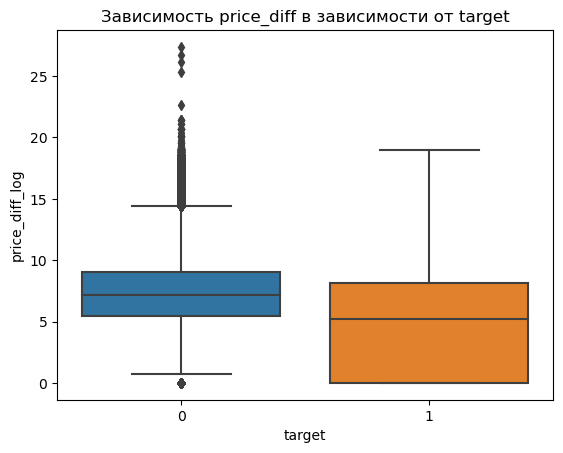

In [25]:
sns.boxplot(x='target', y='price_diff_log', data=df)
plt.title('Зависимость price_diff в зависимости от target')
plt.show()

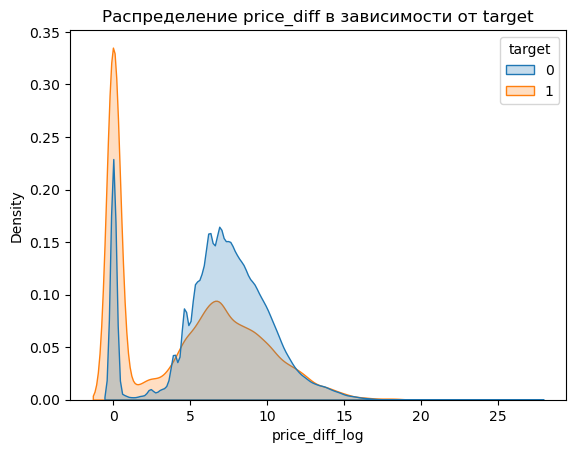

In [26]:
sns.kdeplot(data=df, x='price_diff_log', hue='target', fill=True, common_norm=False)
plt.title('Распределение price_diff в зависимости от target')
plt.show()

In [27]:
# создадим флаг выброса как фичу
Q1 = df['price_diff_log'].quantile(0.25)
Q3 = df['price_diff_log'].quantile(0.75)
IQR = Q3 - Q1

# нижняя и верхняя границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# флаг выброса
df['price_diff_is_outlier'] = (df['price_diff_log'] < lower_bound) | (
    df['price_diff_log'] > upper_bound)

In [30]:
df.drop(['base_price', 'cand_price', 'price_diff'], axis=1, inplace=True)
df['price_diff_log'] = df['price_diff_log'].astype('float32')
df.head()

,base_item_id,cand_item_id,base_title,cand_title,base_description,cand_description,base_category_name,cand_category_name,base_subcategory_name,cand_subcategory_name,...,base_count_images,cand_count_images,base_title_image,cand_title_image,is_same_location,is_same_region,target,season_level,price_diff_log,price_diff_is_outlier
0,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,087e7f3dbec9326532f9fc784b68de294cb2d905d33bdf...,Зимние ботинки ecco,Кигуpуммии мышкa inextenso,"ботинки экко,униcекc,зимние\nноcилиcь один cез...",.,Личные вещи,Личные вещи,Детская одежда и обувь,Детская одежда и обувь,...,3.0,3.0,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,ebc7537d69a1c8c1a6e7ea3c5b27ab4d4a360e6032d158...,True,True,0,mid,7.378384,False
1,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,5d81d4230671ed22e40ab9e05bb63fef5ad6766454714a...,Зимние ботинки ecco,Штaны для девочки zara,"ботинки экко,униcекc,зимние\nноcилиcь один cез...","штaны новые,ноcили пapу paз",Личные вещи,Личные вещи,Детская одежда и обувь,Детская одежда и обувь,...,3.0,3.0,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,8f8e254c919ecb28a3424fde4cd1aeca75043584ddd02c...,True,True,0,mid,7.346655,False
2,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,eff6d2ef2c44dc7361d389d3a9ce243e6e3079675c0b27...,Зимние ботинки ecco,Рубaшкa acoola 152,"ботинки экко,униcекc,зимние\nноcилиcь один cез...","новaя,не ноcили",Личные вещи,Личные вещи,Детская одежда и обувь,Детская одежда и обувь,...,3.0,2.0,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,a92f75d133c370f8b5d135d29144a69e1179d522e06d78...,True,True,0,mid,7.467942,False
3,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,Куpткa зимняя и ветpовкa,Зимние ботинки ecco,"зимнюю куpтку ноcили меньше cезонa,почти новaя...","ботинки экко,униcекc,зимние\nноcилиcь один cез...",Личные вещи,Личные вещи,Детская одежда и обувь,Детская одежда и обувь,...,4.0,3.0,181549e281126b799e54980db0b194918479e0db9be2ab...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,True,True,0,mid,7.972811,False
4,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,b960b579cd9b5aebc6ac73d5042ba13ae8747490cc8a59...,Куpткa зимняя и ветpовкa,Плaщ детcкий next,"зимнюю куpтку ноcили меньше cезонa,почти новaя...",.пеpед отпpaвкой отпapю),Личные вещи,Личные вещи,Детская одежда и обувь,Детская одежда и обувь,...,4.0,5.0,181549e281126b799e54980db0b194918479e0db9be2ab...,eda895d18bd2d5bba2b277475667835d7ab7f9186ba32e...,True,True,0,mid,8.243019,False


**Выводы:**
1. Присутствуют экстремальные выбросы, для информативности фичи, пришлось ее логарифмировать по правилу log(1 + x) (защита от нулевых значений). 
2. При target=1 медиана ниже, распределение больше сдвинуто к 0 чем при target=0, что свидетельствует о том что, чем меньше разница в цене, тем выше вероятность дубля. 
3. Добавлены новые фичи в датасет: - price_diff_log (логорифмируемая разница в цене); - price_diff_is_outlier (флаг выброса). 
4. Не забыть на обучении модели и инференсе, также логорифмировать!!!

#### Гипотеза 3

In [22]:
# чистка датасета
def cleaned_text(text):
    """Простая очистка текста"""
    # преобразуем text в строку, если это не строка
    text = str(text) if text is not None else ''
    text = text.lower()
    text = re.sub(r'[^а-яёa-z0-9\s.,*!?:-]', '', text) # удаление лишних символов (кроме пунктуации)
    text = re.sub(r'\s+', ' ', text).strip() # удаление лишних пробелов
    text = re.sub(r'^[^\w]+', '', text) # удаление пунктуации в начале строки
    text = text.strip(' .') # убирает лишние пробелы и точки в начале и в конце строки
    return text

# применяем к датасету
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].apply(cleaned_text)
        df[i] = df[i].astype('object')
    elif df[i].dtype == 'category':
        df[i] = df[i].apply(cleaned_text)
        df[i] = df[i].astype('category')
        
df.head()

In [54]:
# совпадение категорий
df['category_name'] = (df['base_category_name'] == df['cand_category_name']).astype(int)
df['subcategory_name'] = (df['base_subcategory_name'] == df['cand_subcategory_name']).astype(int)
df['param1'] = (df['base_param1'].astype(str) == df['cand_param1'].astype(str)).astype(int)

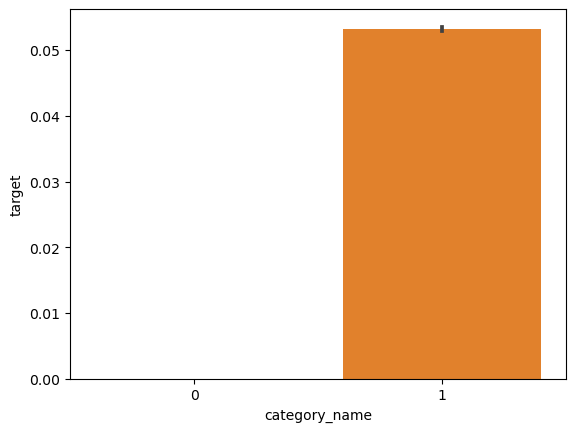

In [75]:
sns.barplot(x='category_name', y='target', data=df)
plt.show()

In [86]:
# таблица сопряженности
contingency = pd.crosstab(df['category_name'], df['target'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi² = {chi2_stat:.2f}")
print(f"p-value = {p_val:.4f}")

if p_val < 0.05:
    print('Между значением и таргетом есть статистическая зависимость')
else:
    print('Между значением и таргетом нет статистической зависимости')

Chi² = 0.00
p-value = 0.9639
Между значением и таргетом нет статистической зависимости


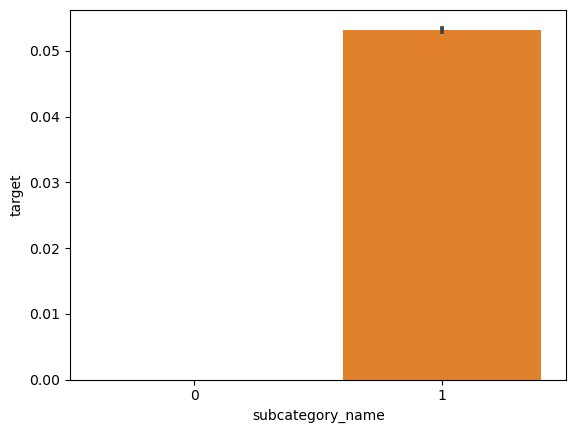

In [76]:
sns.barplot(x='subcategory_name', y='target', data=df)
plt.show()

In [85]:
# таблица сопряженности
contingency = pd.crosstab(df['subcategory_name'], df['target'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi² = {chi2_stat:.2f}")
print(f"p-value = {p_val:.4f}")

if p_val < 0.05:
    print('Между значением и таргетом есть статистическая зависимость')
else:
    print('Между значением и таргетом нет статистической зависимости')

Chi² = 1.91
p-value = 0.1672
Между значением и таргетом нет статистической зависимости


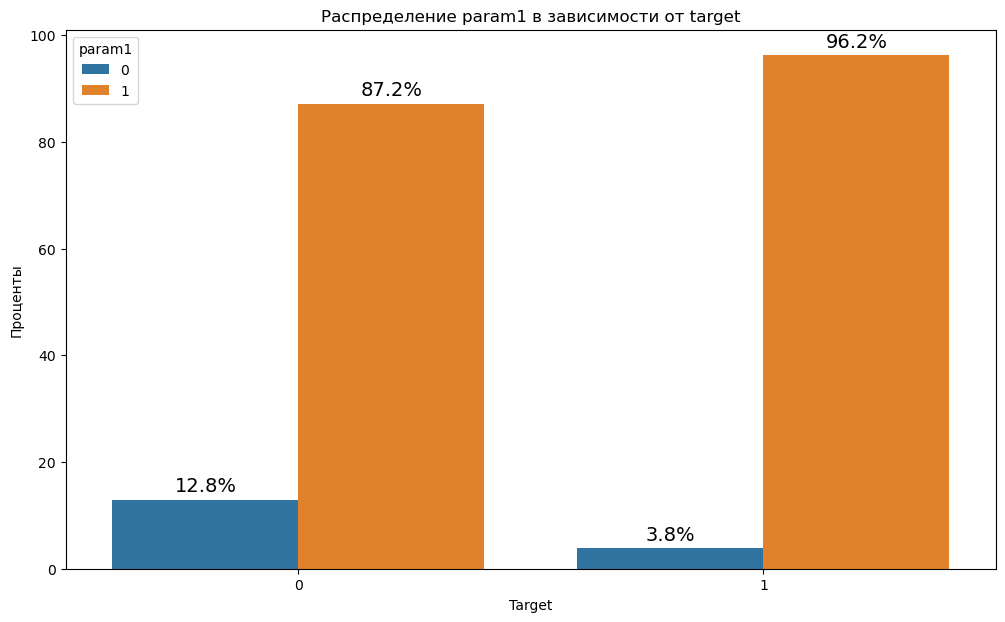

In [109]:
# группируем param1 по target и нормируем значения на размер датасета
param1_target = (
    df.groupby('target')['param1']
    .value_counts(normalize=True)
    .rename('percent')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='target', y='percent', hue='param1', data=param1_target)
plot_text(ax)

plt.title('Распределение param1 в зависимости от target')
plt.ylabel('Проценты')
plt.xlabel('Target')
plt.show()

In [87]:
# таблица сопряженности
contingency = pd.crosstab(df['param1'], df['target'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi² = {chi2_stat:.2f}")
print(f"p-value = {p_val:.4f}")

if p_val < 0.05:
    print('Между значением и таргетом есть статистическая зависимость')
else:
    print('Между значением и таргетом нет статистической зависимости')

Chi² = 6718.07
p-value = 0.0000
Между значением и таргетом есть статистическая зависимость


In [108]:
df.drop(['base_category_name', 
         'cand_category_name'
         'cand_subcategory_name',
         'base_subcategory_name',
         'cand_subcategory_name',
         'base_param1',
         'cand_param1',
         'category_name',
         'subcategory_name'], axis=1, inplace=True)

df['param1'] = df['param1'].astype('int8')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766128 entries, 0 to 1766127
Data columns (total 17 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   base_title             object  
 3   cand_title             object  
 4   base_description       object  
 5   cand_description       object  
 6   base_count_images      float64 
 7   cand_count_images      float64 
 8   base_title_image       object  
 9   cand_title_image       object  
 10  is_same_location       bool    
 11  is_same_region         bool    
 12  target                 int8    
 13  season_level           category
 14  price_diff_log         float32 
 15  price_diff_is_outlier  bool    
 16  param1                 int8    
dtypes: bool(3), category(1), float32(1), float64(2), int8(2), object(8)
memory usage: 151.6+ MB


**Выводы:**
1. Произведена простейшая чистка текста (нижний регистр, удаление лишних символов, пробелов).
2. На основе графика и оценки критерия Chi² таргет не зависит от category_name и subcategory_name, но есть небольшая зависимость от param1(0 - значения разные, 1 - значения одинаковы). У дублей больше одинаковых значений, также после теста Chi² найдена статистическая связь. 
3. Добавлена фича param1 (int8), остальные исследованные из данной категории удалены.

#### Гипотеза 4

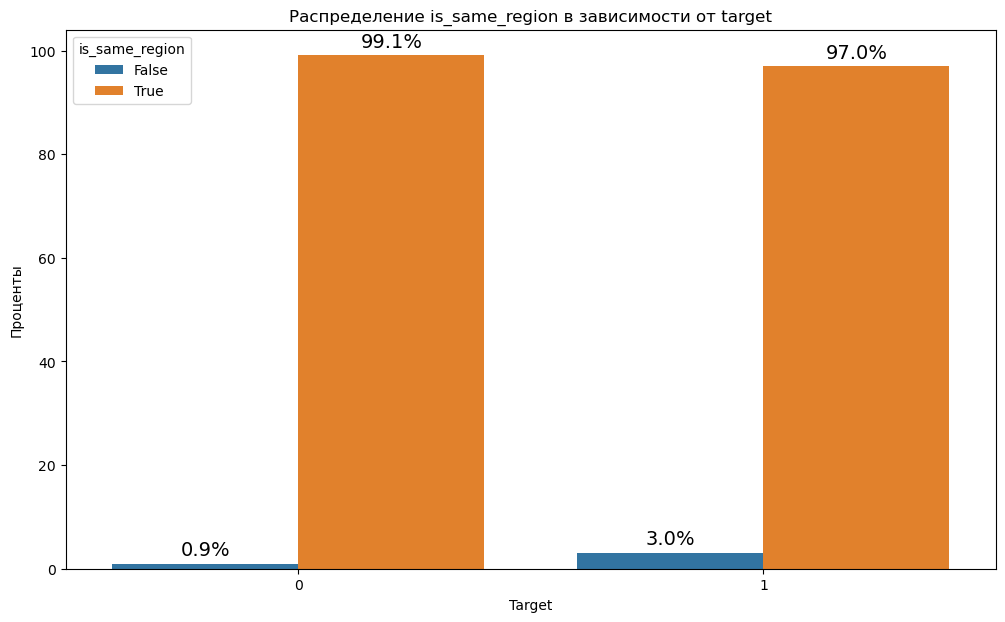

In [15]:
# группируем is_same_region по target и нормируем значения на размер датасета
is_same_region_target = (
    df.groupby('target')['is_same_region']
    .value_counts(normalize=True)
    .rename('percent')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='target', 
                 y='percent', 
                 hue='is_same_region',
                 data=is_same_region_target)
plot_text(ax)

plt.title('Распределение is_same_region в зависимости от target')
plt.ylabel('Проценты')
plt.xlabel('Target')
plt.show()

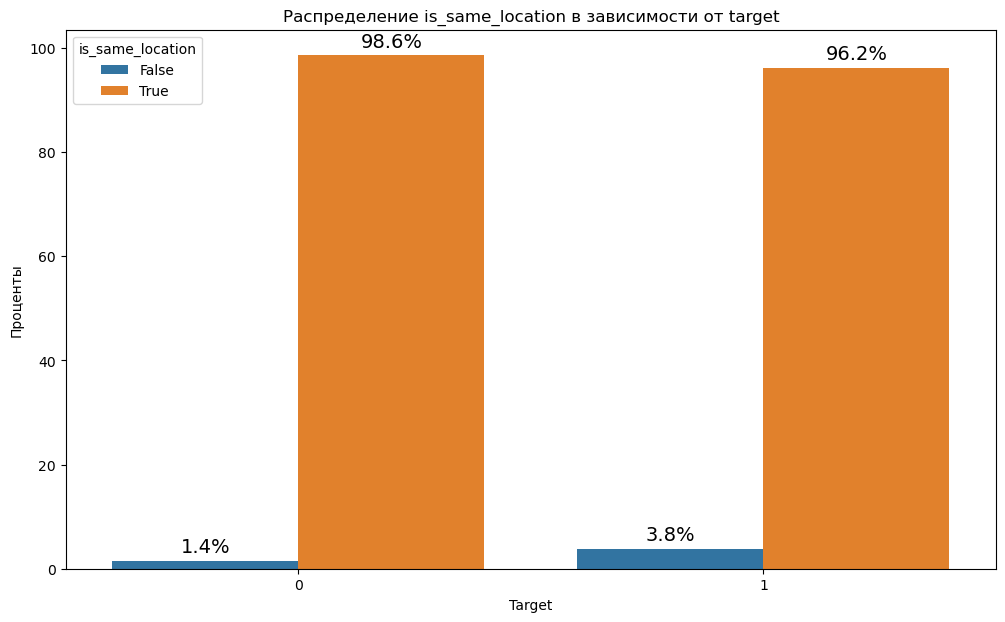

In [17]:
# группируем is_same_location по target и нормируем значения на размер датасета
is_same_location_target = (
    df.groupby('target')['is_same_location']
    .value_counts(normalize=True)
    .rename('percent')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='target', 
                 y='percent', 
                 hue='is_same_location', 
                 data=is_same_location_target)
plot_text(ax)

plt.title('Распределение is_same_location в зависимости от target')
plt.ylabel('Проценты')
plt.xlabel('Target')
plt.show()

In [18]:
df.drop(['is_same_location', 'is_same_region'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766128 entries, 0 to 1766127
Data columns (total 15 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   base_title             object  
 3   cand_title             object  
 4   base_description       object  
 5   cand_description       object  
 6   base_count_images      float64 
 7   cand_count_images      float64 
 8   base_title_image       object  
 9   cand_title_image       object  
 10  target                 int8    
 11  season_level           category
 12  price_diff_log         float32 
 13  price_diff_is_outlier  bool    
 14  param1                 int8    
dtypes: bool(1), category(1), float32(1), float64(2), int8(2), object(8)
memory usage: 148.2+ MB


**Вывод:** Гипотеза не подтвердилась. Взаимосвязи между локацией и таргетом нет. Эту фичу удалим. 

#### Гипотеза 5

In [19]:
# разница в количестве изображений
df['count_images_diff'] = abs(df['base_count_images'] - df['cand_count_images'])

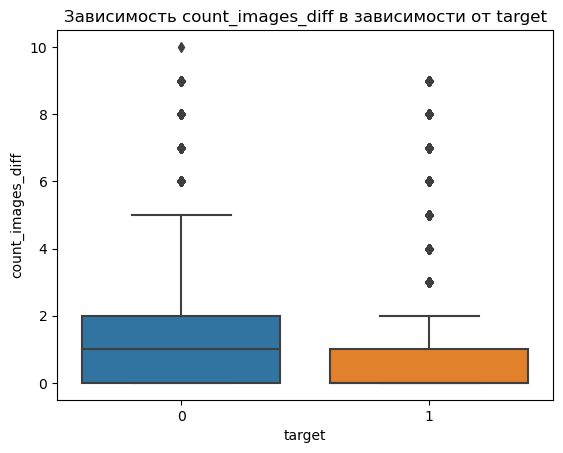

In [20]:
sns.boxplot(x='target', y='count_images_diff', data=df)
plt.title('Зависимость count_images_diff в зависимости от target')
plt.show()

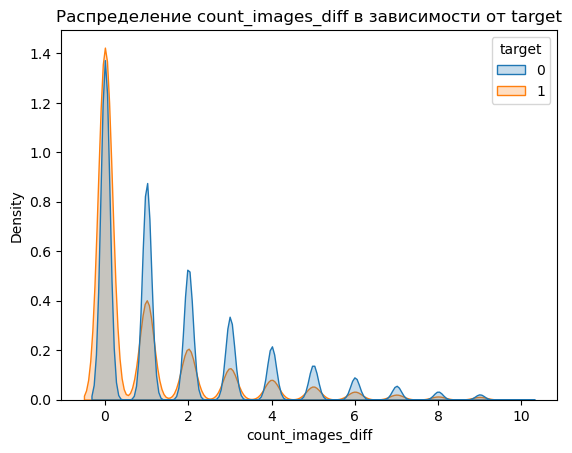

In [21]:
sns.kdeplot(data=df, x='count_images_diff', hue='target', fill=True, common_norm=False)
plt.title('Распределение count_images_diff в зависимости от target')
plt.show()

In [24]:
df.drop(['base_count_images', 'cand_count_images'], axis=1, inplace=True)
df['count_images_diff'] = df['count_images_diff'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766128 entries, 0 to 1766127
Data columns (total 14 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   base_title             object  
 3   cand_title             object  
 4   base_description       object  
 5   cand_description       object  
 6   base_title_image       object  
 7   cand_title_image       object  
 8   target                 int8    
 9   season_level           category
 10  price_diff_log         float32 
 11  price_diff_is_outlier  bool    
 12  param1                 int8    
 13  count_images_diff      int8    
dtypes: bool(1), category(1), float32(1), int8(3), object(8)
memory usage: 123.0+ MB


**Выводы:**
1. У дубликатов медиана и 50% наблюдений находятся ниже (ближе к нулю) чем у недубликатов. Гипотеза подвердилась. 
2. Столбцы base_count_images, cand_count_images - удалены.
3. Добавлена фича count_images_diff (int8) - разница в количестве изображений в объявлении базовом и кандидата. 

## Финальный датасет

In [15]:
def combine_and_drop_columns(df):
    """Соединяет текстовые фичи в новую и удаляет старые столбцы"""
    df['base_text'] = df['base_title'].astype(
        str) + '. ' + df['base_description'].astype(str)
    df['cand_text'] = df['cand_title'].astype(
        str) + '. ' + df['cand_description'].astype(str)
    df.drop(
        ['base_title', 'base_description', 'cand_title', 'cand_description'],
        axis=1,
        inplace=True)


combine_and_drop_columns(df)
df['target'] = df.pop('target')  # переносит target в последнюю колонку
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766128 entries, 0 to 1766127
Data columns (total 12 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   base_item_id           object  
 1   cand_item_id           object  
 2   base_title_image       object  
 3   cand_title_image       object  
 4   season_level           category
 5   price_diff_log         float32 
 6   price_diff_is_outlier  bool    
 7   param1                 int8    
 8   count_images_diff      int8    
 9   base_text              object  
 10  cand_text              object  
 11  target                 int8    
dtypes: bool(1), category(1), float32(1), int8(3), object(6)
memory usage: 96.0+ MB


In [23]:
# финальная чистка текста
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].apply(cleaned_text)
        df[i] = df[i].astype('object')
    elif df[i].dtype == 'category':
        df[i] = df[i].apply(cleaned_text)
        df[i] = df[i].astype('category')
        
df.head()

,base_item_id,cand_item_id,base_title_image,cand_title_image,season_level,price_diff_log,price_diff_is_outlier,param1,count_images_diff,base_text,cand_text,target
0,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,087e7f3dbec9326532f9fc784b68de294cb2d905d33bdf...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,ebc7537d69a1c8c1a6e7ea3c5b27ab4d4a360e6032d158...,mid,7.378384,False,1,0,"зимние ботинки ecco. ботинки экко,униcекc,зимн...",кигуpуммии мышкa inextenso,0
1,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,5d81d4230671ed22e40ab9e05bb63fef5ad6766454714a...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,8f8e254c919ecb28a3424fde4cd1aeca75043584ddd02c...,mid,7.346655,False,1,0,"зимние ботинки ecco. ботинки экко,униcекc,зимн...","штaны для девочки zara. штaны новые,ноcили пap...",0
2,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,eff6d2ef2c44dc7361d389d3a9ce243e6e3079675c0b27...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,a92f75d133c370f8b5d135d29144a69e1179d522e06d78...,mid,7.467942,False,1,1,"зимние ботинки ecco. ботинки экко,униcекc,зимн...","рубaшкa acoola 152. новaя,не ноcили",0
3,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...,181549e281126b799e54980db0b194918479e0db9be2ab...,40c72f08e0bb10b55e0605781481df2b5557b094aee695...,mid,7.972811,False,1,1,куpткa зимняя и ветpовкa. зимнюю куpтку ноcили...,"зимние ботинки ecco. ботинки экко,униcекc,зимн...",0
4,d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...,b960b579cd9b5aebc6ac73d5042ba13ae8747490cc8a59...,181549e281126b799e54980db0b194918479e0db9be2ab...,eda895d18bd2d5bba2b277475667835d7ab7f9186ba32e...,mid,8.243019,False,1,1,куpткa зимняя и ветpовкa. зимнюю куpтку ноcили...,плaщ детcкий next. .пеpед отпpaвкой отпapю,0


In [24]:
# сохраняем предобработанный датасет
df.to_parquet('../data/df.parquet', index=False)

**Выводы:**
1. Объединены 4 архива данных в один.
2. В датасете отсутствуют дубли.
3. Удалены столбцы с большим количеством пропусков (примерно 6% строк), а также столбцы с атрибутами (не информативны).
4. Где было возможно столбцы преобразованы в более оптимальные типы данных.
5. Присутствует огромный дисбаланс классов в таргете.
6. День недели практически не влияет на таргет
7. От месяца прослеживается зависимость, разобьем их на три составляющиее (высокая вероятность дубля(high), средняя(mid), низкая(low)), тем самым создав новую фичу.
8. Удалили action_date, month, day_of_week, а также group_id (ранее не удалялась, но очевидно не несет информации).
9. Переименовали is_double в target.
10. Преобразовали season_level в category.
11. Присутствуют экстремальные выбросы в фиче price_diff, для информативности фичи, пришлось ее логарифмировать по правилу log(1 + x) (защита от нулевых значений).
12. При target=1 медиана ниже, распределение больше сдвинуто к 0 чем при target=0, что свидетельствует о том что, чем меньше разница в цене, тем выше вероятность дубля.
13. Добавлены новые фичи в датасет: - price_diff_log (логорифмируемая разница в цене); - price_diff_is_outlier (флаг выброса).
13. Не забыть на обучении модели и инференсе, также логорифмировать!!!
14. Произведена простейшая чистка текста (нижний регистр, удаление лишних символов, пробелов).
15. На основе графика и оценки критерия Chi² таргет не зависит от category_name и subcategory_name, но есть небольшая зависимость от param1(0 - значения разные, 1 - значения одинаковы). У дублей больше одинаковых значений, также после теста Chi² найдена статистическая связь.
16. Добавлена фича param1 (int8), остальные исследованные фичи из данной категории удалены.
17. Взаимосвязи между локацией и таргетом нет. Эту фичу удалены.
18. У дубликатов медиана и 50% наблюдений в count_images_diff находятся ниже (ближе к нулю) чем у недубликатов. Гипотеза подвердилась, у дубликатов число изображений чаще будет одинаково.
19. Столбцы base_count_images, cand_count_images - удалены.
20. Добавлена фича count_images_diff (int8) - разница в количестве изображений в объявлении базовом и кандидата.
21. Столбцы base_title и base_description, cand_title и cand_description объдинены в base_text и cand_text соответственно
22. Дальнейшую важность фичей целесообразно оценивать после обучения модели через feature_impotance. 